In [2]:
import numpy as np
import pandas as pd


In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import io,color
from skimage.util import img_as_ubyte

#### 1. Loading and displaying original image

In [29]:
image = io.imread("car.jpg")

In [30]:
image.shape

(1440, 1920, 3)

#### 2. converting to gray image

In [31]:
gray_image = color.rgb2gray(image)

In [32]:
gray_image.shape

(1440, 1920)

In [33]:
gray_image

array([[0.23137255, 0.23137255, 0.23137255, ..., 0.23921569, 0.23921569,
        0.23921569],
       [0.23137255, 0.23137255, 0.23137255, ..., 0.23921569, 0.23921569,
        0.23921569],
       [0.23137255, 0.23137255, 0.23137255, ..., 0.23921569, 0.23921569,
        0.23921569],
       ...,
       [0.59607843, 0.59607843, 0.59607843, ..., 0.60392157, 0.60392157,
        0.60392157],
       [0.59607843, 0.59607843, 0.59607843, ..., 0.60392157, 0.60392157,
        0.60392157],
       [0.59607843, 0.59607843, 0.59607843, ..., 0.60392157, 0.60392157,
        0.60392157]])

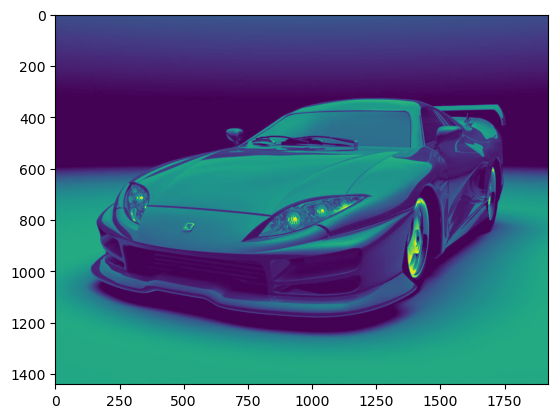

In [34]:
plt.imshow(gray_image)

Text(0.5, 1.0, 'Original Image')

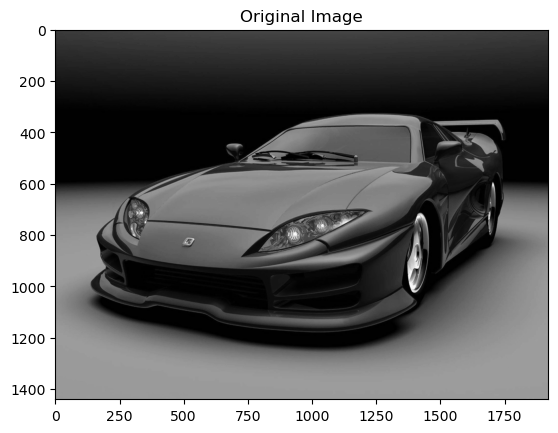

In [35]:
plt.imshow(gray_image,cmap='gray')
plt.title("Original Image")

In [37]:
flattern_image = gray_image.reshape(gray_image.shape[0],-1)

In [39]:
flattern_image.shape

(1440, 1920)

#### 3.Creating a PCA object

In [63]:
pc =PCA(n_components=0.95)

In [64]:
tr_data = pc.fit_transform(gray_image)
tr_data

array([[-0.75676808,  1.0842326 , -0.05882337, ..., -0.09380721,
         0.11964437, -0.10926442],
       [-0.76644783,  1.0715669 , -0.06267255, ..., -0.09959042,
         0.12449888, -0.11391318],
       [-0.77564887,  1.07364625, -0.06534332, ..., -0.09554659,
         0.12093759, -0.11621019],
       ...,
       [13.74149984,  1.8824504 ,  2.73150026, ...,  0.02153537,
         0.08746283, -0.19631293],
       [13.74098465,  1.88309327,  2.73163201, ...,  0.02149937,
         0.08752127, -0.19648549],
       [13.74108797,  1.88295745,  2.73159777, ...,  0.02150624,
         0.0874868 , -0.19647288]])

In [65]:
recon_image = pc.inverse_transform(tr_data)
recon_image

array([[0.23582558, 0.23582594, 0.23582752, ..., 0.24044534, 0.24043837,
        0.24043968],
       [0.23584532, 0.2358457 , 0.23584736, ..., 0.24041241, 0.2404078 ,
        0.24040913],
       [0.23564971, 0.23565009, 0.23565168, ..., 0.24018697, 0.24018214,
        0.24018342],
       ...,
       [0.59472549, 0.59472629, 0.59473078, ..., 0.60392978, 0.60392507,
        0.60392716],
       [0.59467212, 0.59467292, 0.59467743, ..., 0.60386863, 0.60386398,
        0.60386607],
       [0.59468473, 0.59468553, 0.59469003, ..., 0.60388207, 0.60387742,
        0.60387951]])

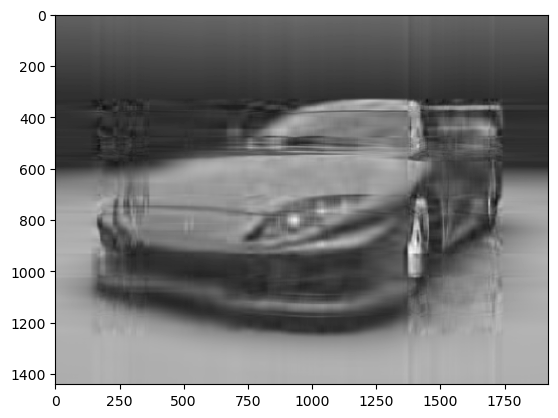

In [66]:
plt.imshow(recon_image,cmap="gray")

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
mms = MinMaxScaler()

In [84]:
comp_img_norm = mms.fit_transform(recon_image)

In [98]:
compresss_img_norm = ((comp_img_norm-comp_img_norm.min())/(comp_img_norm.max()-comp_img_norm.min()))

In [99]:
compresss_img_norm

array([[0.40751023, 0.40751218, 0.40751964, ..., 0.40306334, 0.40273696,
        0.40279562],
       [0.40754026, 0.40754225, 0.40754982, ..., 0.40301256, 0.4026898 ,
        0.40274849],
       [0.40724269, 0.40724467, 0.40725213, ..., 0.40266496, 0.40234172,
        0.40240033],
       ...,
       [0.95348525, 0.95348856, 0.95351059, ..., 0.96351501, 0.96341261,
        0.96347414],
       [0.95340407, 0.95340738, 0.95342943, ..., 0.96342073, 0.96331837,
        0.96337991],
       [0.95342325, 0.95342656, 0.9534486 , ..., 0.96344145, 0.9633391 ,
        0.96340064]])

In [102]:
convert_image_byte = img_as_ubyte(compresss_img_norm)

In [104]:
io.imsave("new_img_comp.jpg",convert_image_byte)